# Week 36 Exercises Group: Eyyüb Güven, Alicja Terelak, Giorgio Chirio

## Exercise 1

### A)

$\frac {d}{d\beta} (y-X\beta)^T(y-X\beta)+\lambda\beta^T\beta = 0$

$-2(y-X\beta)^TX+\lambda2\beta^T = 0$

$-X^T(y-X\beta)+\lambda\beta = 0$

$-X^Ty+X^TX\beta+\lambda\beta = 0$

$(X^TX+I\lambda)\beta = X^Ty$

$\beta = (X^TX+I\lambda)^-1X^Ty$

### B)

$X=U\Sigma V^T$

$\tilde{y_{OLS}} = X\beta =X(X^TX)^-1X^Ty =U\Sigma V^T((U\Sigma V^T)^TU\Sigma V^T)^{-1}(U\Sigma V^T)^Ty =$

$U\Sigma V^T(V\tilde{\Sigma^2}(V^T))^{-1} U^T\Sigma^TVy = U\tilde{\Sigma^2}(\tilde{\Sigma^2})^{-1} U^Ty = U^TUy = \sum_{j=0}^{p-1}u_ju_j^Ty$

## Exercise 2:

Version with GUI (Requires module Tkinter)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score
from tkinter import *


import sys

def calc_ridge():
    #result.delete("1.0", "end")

    np.random.seed(2023)
    n = 100

    degrees = int(degree.get())
    lmb_val = int(lmd.get())
    x = np.linspace(-3, 3, n).reshape(-1, 1)
    y = np.exp(-x**2) + 1.5 * np.exp(-(x-2)**2)+ np.random.normal(0, 0.1, x.shape)


    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_scaled_train = scaler.transform(X_train)
    X_scaled_test = scaler.transform(X_test)


    Xm_train = np.zeros((len(X_train), degrees))

    for i in range(degrees):
        Xm_train[:,i] = X_scaled_train[:,0] ** i

    Xm_test = np.zeros((len(X_test), degrees))
    for i in range(degrees):
        Xm_test[:,i] = X_scaled_test[:,0] ** i

    lmb = [0.0001,0.001,0.01,0.1,1.0]

    beta = (np.linalg.inv(Xm_train.T @ Xm_train + lmb[lmb_val] * np.identity(degrees)) @ Xm_train.T ) @ y_train

    ytilde_train = Xm_train @ beta
    ytilde_test = Xm_test @ beta

    mse_train = np.mean( np.mean((y_train - ytilde_train)**2))
    mse_test = np.mean( np.mean((y_test - ytilde_test)**2))

    result.insert(END, "With degree " + str(degrees) +" and lambda = : " + str(lmb[lmb_val]) + "\nMSE of training data with degree "+ str(degrees) +" polinomial: "+ str(mse_train) +" \nMSE of testing data with degree "+ str(degrees) +" polinomial: "+ str(mse_test)+ "\n")

    """print("MSE of training data with 5th degree polinomial: ", mse_train)
    print("MSE of testing data with 5th degree polinomial: ", mse_test)"""

    plt.plot(x, y, "r-")
    plt.scatter(X_train, ytilde_train, label="Train")
    plt.scatter(X_test, ytilde_test, label="Test")
    plt.legend()
    plt.show()


def reset_graph():
    plt.clf()
    plt.show()


window = Tk()
window.geometry("750x500")

degree_lbl = Label(text="Number of degrees:")
lambda_lbl = Label(text="Lambda value in arr (0-4):")
degree = Entry()
lmd = Entry()
degree.insert(0, "5")
lmd.insert(0, "0")
button = Button(text="Calcola", command = calc_ridge)
reset = Button(text="Reset", command = reset_graph)
result = Text(width=70, height=15)

degree_lbl.pack()
degree.pack()
lambda_lbl.pack()
lmd.pack()
button.pack()

result.pack()

reset.pack()


window.mainloop()






Version without GUI (Does not requires module Tkinter)

MSE of training data with 5th degree polinomial:  0.03067952974946995
MSE of testing data with 5th degree polinomial:  0.049723816713807385


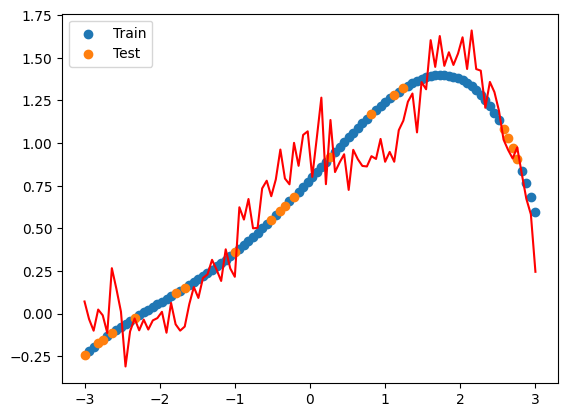

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score


import sys

np.random.seed(2023)
n = 100

degrees = 5
lmb_val = 0
x = np.linspace(-3, 3, n).reshape(-1, 1)
y = np.exp(-x**2) + 1.5 * np.exp(-(x-2)**2)+ np.random.normal(0, 0.1, x.shape)


X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
scaler = StandardScaler()
scaler.fit(X_train)
X_scaled_train = scaler.transform(X_train)
X_scaled_test = scaler.transform(X_test)


Xm_train = np.zeros((len(X_train), degrees))

for i in range(degrees):
    Xm_train[:,i] = X_scaled_train[:,0] ** i

Xm_test = np.zeros((len(X_test), degrees))
for i in range(degrees):
    Xm_test[:,i] = X_scaled_test[:,0] ** i

lmb = [0.0001,0.001,0.01,0.1,1.0]

beta = (np.linalg.inv(Xm_train.T @ Xm_train + lmb[lmb_val] * np.identity(degrees)) @ Xm_train.T ) @ y_train

ytilde_train = Xm_train @ beta
ytilde_test = Xm_test @ beta

mse_train = np.mean( np.mean((y_train - ytilde_train)**2))
mse_test = np.mean( np.mean((y_test - ytilde_test)**2))



print("MSE of training data with 5th degree polinomial: ", mse_train)
print("MSE of testing data with 5th degree polinomial: ", mse_test)

plt.plot(x, y, "r-")
plt.scatter(X_train, ytilde_train, label="Train")
plt.scatter(X_test, ytilde_test, label="Test")
plt.legend()
plt.show()
